# import packages

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 
plt.style.use('ggplot')
import seaborn as sns


In [2]:
df=pd.read_csv('./Social_Network_Ads.csv')

# Explore data 

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [5]:
df.Gender.value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

In [6]:
df.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [7]:
Purchased=df[df['Purchased']==1]

In [8]:
Purchased.shape

(143, 5)

In [9]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
df['Gender'] = labelencoder_y.fit_transform(df['Gender'])

In [10]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [11]:
plt.barplot?

Object `plt.barplot` not found.


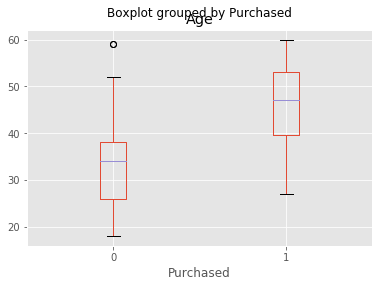

In [12]:
df.boxplot(column='Age', by='Purchased')

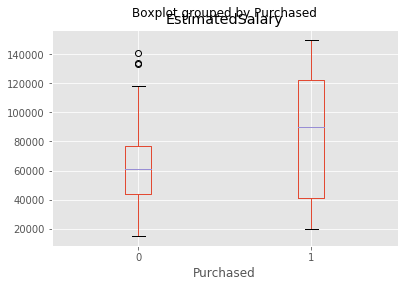

In [13]:
df.boxplot(column='EstimatedSalary', by='Purchased');

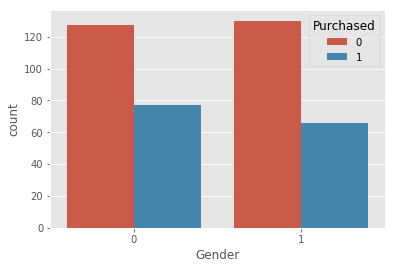

In [14]:
 sns.countplot(x="Gender", hue="Purchased", data=df)

In [15]:
corr=df.corr()

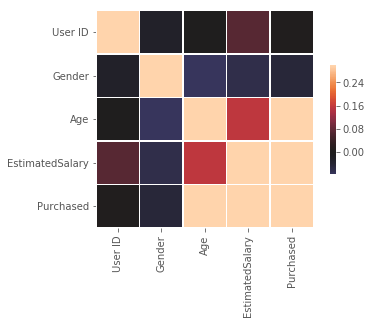

In [16]:
sns.heatmap(corr,  vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# KNN Classification

In [17]:
X=df[['Gender', 'Age', 'EstimatedSalary']]
y=df['Purchased']

In [18]:
print(X.shape)
print(y.shape)

(400, 3)
(400,)


In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [21]:
for n in range( 3,11, 2):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_pred=knn.predict(X_test)
    print('accuracy for ', n, ' is:', accuracy_score(y_test, y_pred))
    ct=pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
    print (ct)
    precision, recall, fscore, support = score(y_test, y_pred)
    print('precision: {}'.format(precision))
    print('recall: {}'.format(recall))
    print('fscore: {}'.format(fscore))
    print('support: {}'.format(support))
    print ('*********************************************')
    

accuracy for  3  is: 0.8
Predicted    0   1  All
True                   
0           88  12  100
1           20  40   60
All        108  52  160
precision: [0.81481481 0.76923077]
recall: [0.88       0.66666667]
fscore: [0.84615385 0.71428571]
support: [100  60]
*********************************************
accuracy for  5  is: 0.8
Predicted    0   1  All
True                   
0           93   7  100
1           25  35   60
All        118  42  160
precision: [0.78813559 0.83333333]
recall: [0.93       0.58333333]
fscore: [0.85321101 0.68627451]
support: [100  60]
*********************************************
accuracy for  7  is: 0.7875
Predicted    0   1  All
True                   
0           90  10  100
1           24  36   60
All        114  46  160
precision: [0.78947368 0.7826087 ]
recall: [0.9 0.6]
fscore: [0.8411215  0.67924528]
support: [100  60]
*********************************************
accuracy for  9  is: 0.78125
Predicted    0   1  All
True                   
0      

In [25]:

cm = confusion_matrix(y_test, y_pred)
cm

array([[87, 13],
       [22, 38]], dtype=int64)

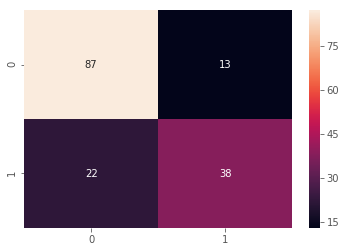

In [26]:
sns.heatmap(cm, annot=True, fmt="d")

In [27]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,87,13,100
1,22,38,60
All,109,51,160


# Support Vector Machine

In [28]:
from sklearn.svm import SVC
clf = SVC(gamma='auto')
clf.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [29]:
y_pred=clf.predict(X_test)

In [30]:
print(accuracy_score(y_test, y_pred))

0.6625


# Logistic Regression with Grid search CV

In [69]:
from sklearn.linear_model import LogisticRegressionCV

In [70]:
LRCV=LogisticRegressionCV(cv=5, random_state=0,
                          multi_class='auto').fit(X_train, y_train)

In [71]:
y_pred_LRCV=LRCV.predict(X_test)

In [72]:
print(accuracy_score(y_test, y_pred_LRCV))

0.79375


In [99]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [100]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}

In [101]:
import warnings; warnings.simplefilter('ignore')

In [102]:
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [103]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1000.0, 'penalty': 'l1'}
accuracy : 0.8375


In [104]:
y_pred_logcv=logreg_cv.predict(X_test)

In [105]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_LRCV))

              precision    recall  f1-score   support

           0       0.77      0.96      0.85       100
           1       0.89      0.52      0.65        60

   micro avg       0.79      0.79      0.79       160
   macro avg       0.83      0.74      0.75       160
weighted avg       0.81      0.79      0.78       160



In [106]:
y_pred_logcv=logreg_cv.predict(X_test)

In [107]:
print(classification_report(y_test,y_pred_logcv))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88       100
           1       0.90      0.62      0.73        60

   micro avg       0.83      0.83      0.83       160
   macro avg       0.85      0.79      0.80       160
weighted avg       0.84      0.83      0.82       160



In [108]:
print(accuracy_score(y_test, y_pred_logcv))

0.83125


In [109]:
import sklearn.metrics as metrics

In [110]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_LRCV)
roc_auc = metrics.auc(fpr, tpr)
fpr_grid, tpr_grid, threshold_grid = metrics.roc_curve(y_test, y_pred_logcv)
roc_auc_grid = metrics.auc(fpr_grid, tpr_grid)

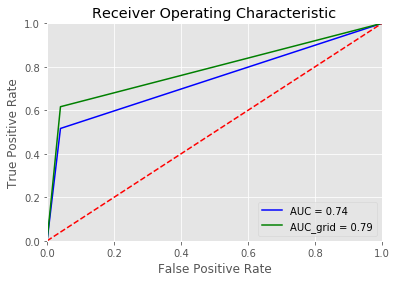

In [111]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot(fpr_grid, tpr_grid, 'g', label = 'AUC_grid = %0.2f' % roc_auc_grid)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

(0, 1)

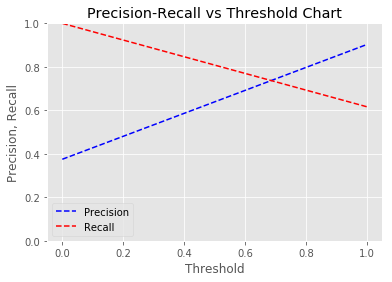

In [112]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_logcv) 
   #retrieve probability of being 1(in second column of probs_y)
pr_auc = metrics.auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])

In [113]:
fpr

array([0.  , 0.04, 1.  ])

In [114]:
tpr

array([0.        , 0.51666667, 1.        ])

In [115]:
len(fpr)

3

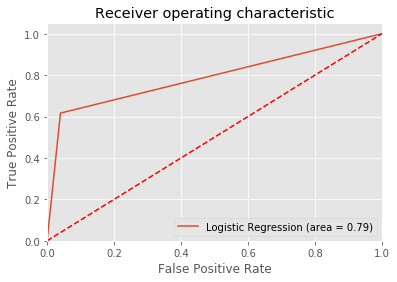

In [116]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred_logcv)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_logcv)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()